In [39]:
# importing packages

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from plotnine import *

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

import matplotlib.pyplot as plt

from sklearn.metrics import silhouette_score

%matplotlib inline

In [40]:
# importing csv file and saving as dataframe
url = 'https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KrispyKreme.csv'
df = pd.read_csv(url)

df.head()

,Restaurant_Item_Name,restaurant,Restaurant_ID,Item_Name,Item_Description,Food_Category,Serving_Size,Serving_Size_text,Serving_Size_Unit,Serving_Size_household,...,Total_Fat_100g,Saturated_Fat_100g,Trans_Fat_100g,Cholesterol_100g,Sodium_100g,Potassium_100g,Carbohydrates_100g,Protein_100g,Sugar_100g,Dietary_Fiber_100g
0,Krispy Kreme Apple Fritter,Krispy Kreme,49,Apple Fritter,"Apple Fritter, Doughnuts",Baked Goods,100,NaN,g,NaN,...,19,9,0,0,110,45.0,42,4,26,1.0
1,Krispy Kreme Chocolate Iced Cake Doughnut,Krispy Kreme,49,Chocolate Iced Cake Doughnut,"Chocolate Iced Cake Doughnut, Doughnuts",Baked Goods,71,NaN,g,NaN,...,18,7,0,35,437,49.0,52,4,27,NaN
2,Krispy Kreme Chocolate Iced Custard Filled Dou...,Krispy Kreme,49,Chocolate Iced Custard Filled Doughnut,"Chocolate Iced Custard Filled Doughnut, Doughnuts",Baked Goods,85,NaN,g,NaN,...,18,8,0,0,165,59.0,44,5,20,1.0
3,Krispy Kreme Chocolate Iced Glazed Doughnut,Krispy Kreme,49,Chocolate Iced Glazed Doughnut,"Chocolate Iced Glazed Doughnut, Doughnuts",Baked Goods,63,NaN,g,NaN,...,17,8,0,0,143,56.0,52,5,32,NaN
4,Krispy Kreme Chocolate Iced Glazed Cruller Dou...,Krispy Kreme,49,Chocolate Iced Glazed Cruller Doughnut,"Chocolate Iced Glazed Cruller Doughnut, Doughnuts",Baked Goods,70,NaN,g,NaN,...,14,6,0,29,386,29.0,57,4,37,NaN


## A. Scatterplots Using 'ggplot'
### A1) `Sodium_100g` vs `Total_Fat_100g` Scatterplot

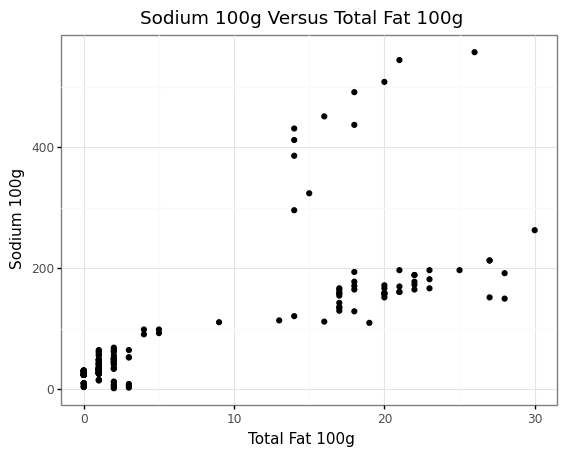

<ggplot: (155843887638)>

In [41]:
# creating scatterplot
df1 = df[['Sodium_100g', 'Total_Fat_100g']]

(ggplot(df1, aes(x = 'Total_Fat_100g', y = 'Sodium_100g')) + geom_point() + 
theme_minimal() + theme_bw() + ggtitle('Sodium 100g Versus Total Fat 100g') + 
labs(x = 'Total Fat 100g', y = 'Sodium 100g'))

### A2) `Sodium_100g` vs. `Sugar_100g` Scatterplot

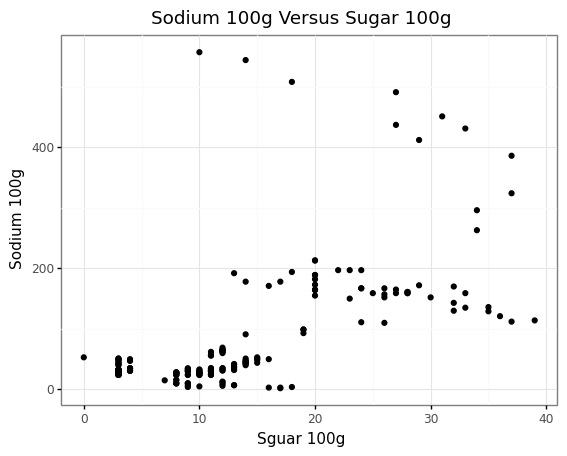

<ggplot: (155843489931)>

In [42]:
# creating scatterplot
df2 = df[['Sodium_100g', 'Sugar_100g']]

(ggplot(df2, aes(x = 'Sugar_100g', y = 'Sodium_100g')) + geom_point() + 
theme_minimal() + theme_bw() + ggtitle('Sodium 100g Versus Sugar 100g') + 
labs(x = 'Sguar 100g', y = 'Sodium 100g'))

### A3) `Sugar_100g` vs `Total_Fat_100g` Scatterplot

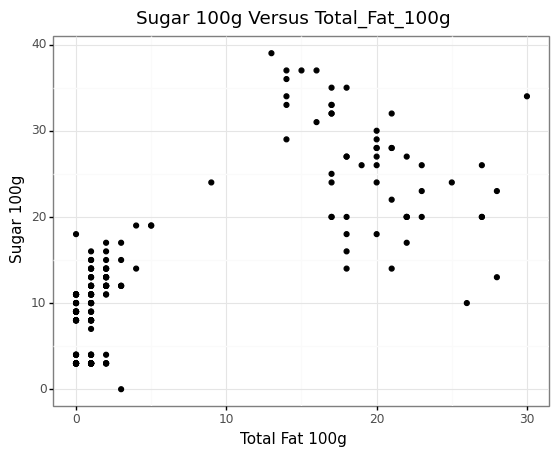

<ggplot: (155843448890)>

In [43]:
# creating scatterplot
df3 = df[['Total_Fat_100g', 'Sugar_100g']]

(ggplot(df3, aes(x = 'Total_Fat_100g', y = 'Sugar_100g')) + geom_point() + 
theme_minimal() + theme_bw() + ggtitle('Sugar 100g Versus Total_Fat_100g') + 
labs(x = 'Total Fat 100g', y = 'Sugar 100g'))

## B. Examination of Clustering Methods

When examining the scatterplots, I thought that **Gaussian Mixture Models (EM)** may be the best clustering method. Gaussian Mixture Models (EM) is an algorithm that calculates the probability of a data point beloning to a cluster (probabilistic assignment). Instead of assuming that all of the variables have the same variance, the model explicitly estimates what that the variance is. This allows for the consideration of elliptical clusters. When examining the scatterplot, some of the points seemed to conform to an elliptical shape, making it a good candidate for EM. 

**DBSCAN** is a method of density-based clustering that divides a dataset based on the "neighborhood distance" (ε). This algorithm classifies every data point as part of a cluster or as noise. The number of clusters is automatically generated by the model. However, this algorithim is susceptible to variable density clusters and performs poorly with high dimensional data. Our scatterplots show that there is some degree of variability in density, which made me think that this model would not be best. 

The **K-means** algorithm is a method of centroid-based clustering. The models attempts to classify each object in a dataset to allow the clusters converge to a stable cluster membership. However, there are some assumptions associated with K-means that would not be suitable for this dataset: there are spherical clusters in the dataset and there are roughly the same number of points in each cluster. When examing the scatterplots, we see that none of the graphs fulfill both conditions — giving the impression that K-means would be a less than ideal choice for our dataset. In addition, this algorithm requires the user to either guess an optimal *k* value or make calculations to specity it.


**Agglomerative Hierarchial Clustering** is method of bottom-up clustering to forms clusters based on the distances between objects of the whole dataset. After applying this method, a dendrogram of data is produced, allowing one to view the structure of the information. However, the complexity of the algorithm may be excessive or inapplicable in this data where there may be little to no hierarchy. When I was examining this dataset, I did not see a clear hierarchy in the data, which influenced me to not use this algorithm.


## C. Algorithm Implementation
### C1) Prediction: Gaussian Mixture Model (EM) - Predicted Best Performance

[0.7370506230329484, 0.7406259709296275, 0.6825505244408837, 0.5415348927648055, 0.508429844893468, 0.4951895127350403, 0.47269476834928836, 0.40159009958014746, 0.47184335665824684]


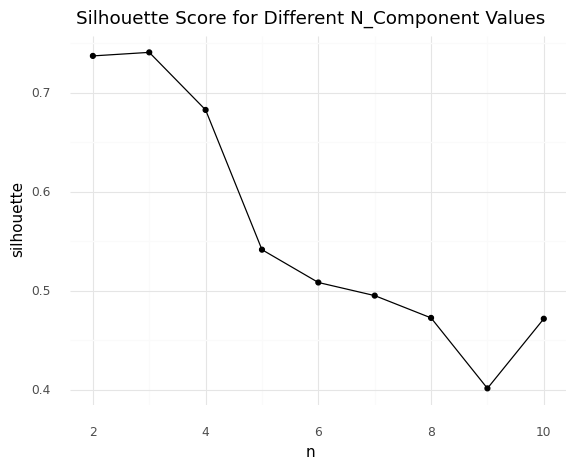

<ggplot: (155843501279)>

In [44]:
# Gaussian Mixture Model (EM)

# selecting features
features = ['Sodium_100g', 'Total_Fat_100g', 'Sugar_100g']

X = df[features]

# z-scoring
z = StandardScaler()
X[features] = z.fit_transform(X)
Xdf = X

# finding the best n_components value
sils = []
n_components = [2,3,4,5,6,7,8,9,10]

for n in n_components:
    gmm = GaussianMixture(n_components = n)
    gmm.fit(X)
    pred = gmm.predict(X)

    sils.append(silhouette_score(X, pred))

print(sils)

# saving silhouette scores and n_components to dataframe 
sils_df = pd.DataFrame({"n": n_components,
                      "silhouette": sils})

#plot
(ggplot(sils_df, aes(x = "n", y = "silhouette")) + geom_point() + geom_line() + 
theme_minimal() + labs(title = "Silhouette Score for Different N_Component Values"))


In [45]:
EM = GaussianMixture(n_components = 3)
EM.fit(X)

EMcluster = EM.predict(X)
X['EM_Clusters'] = EMcluster
print(silhouette_score(X, EMcluster))

0.7640774326557077


### EM Hyperparameter - Choosing n_components
The 'n_components' hyperparameter was chosen to be 3 for the Gaussian Mixture Model (EM). This number was obtained by running a loop that examined the silhouette scores from models with different n_component values. These were then plotted in a scatterplot to visualize the trend. Ideally, a high silhouette score is preferred as it indicates a high amount of separation and cohesion. For this dataset, I found that the silhouette score was highest when n_component = 3. After this mark, the graph decreased sharply indicating a drop in the silhouette score Thus, '3' was chosen to be the n_components hyperparameter for this model.

### C2) K-means - Predicted Worst Performance

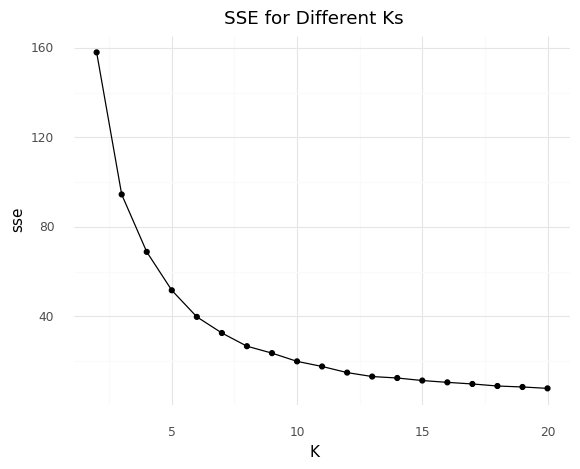

<ggplot: (155843233895)>

In [46]:
# K-Means

# selecting features
features = ['Sodium_100g', 'Total_Fat_100g', 'Sugar_100g']

X = df[features]

# z-score
z = StandardScaler()

X[features] = z.fit_transform(X[features])

# finding the best k value to use
ks = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

# saving sse and silhouette scores to dataframe
sse = []
sils = []

for k in ks:
    km = KMeans(n_clusters = k)
    km.fit(X)
    
    sse.append(km.inertia_)
    sils.append(silhouette_score(X, km.predict(X)))
    
sse_df = pd.DataFrame({"K": ks,
                      "sse": sse,
                      "silhouette": sils})

# sum of squared errors plot
(ggplot(sse_df, aes(x = "K", y = "sse")) + geom_point() + 
geom_line() + theme_minimal() + labs(title = "SSE for Different Ks"))

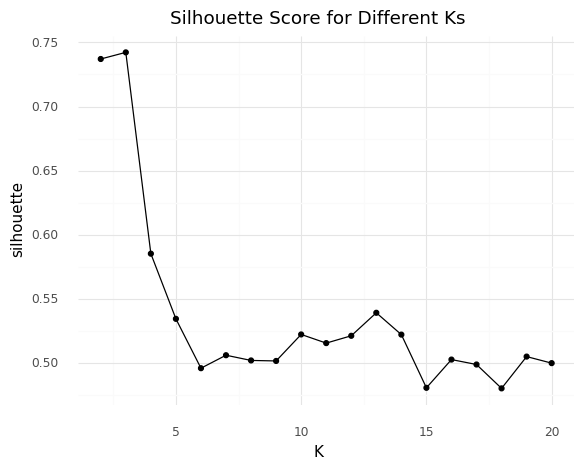

<ggplot: (155843220619)>

In [47]:
# plot for silhouette score
(ggplot(sse_df, aes(x = "K", y = "silhouette")) + geom_point() + geom_line() + 
theme_minimal() + labs(title = "Silhouette Score for Different Ks"))

In [48]:
# creating K-Means model with chosen k value
km = KMeans(n_clusters = 3)
km.fit(X)

km_clusters = km.predict(X)
X["K-Means Clusters"] = km_clusters

print(silhouette_score(X[features], km_clusters))

0.7422190230687878


### K-Means Hyperparameter - k value

K-Means utilizes the hyperparameter "k" to determine the number of centroids, and assigns every other data point to the nearest cluster while keeping the centroids as small as possible. The optimal k value was determined by testing a range of possible k values in the model. The sum of squared errors and silhouette scores were obtained and plotted to illustrate their respective trends. For the graph of sum of squared errors, the elbow method was employed to pick the value of k (3) at which the graph decreased significantly. Similar to the Gaussian Mixture Model, a higher silhouette score is preferred because it indicates high cohesion and separation. The highest silhouette score within this model was also at 3. Thus, '3' was chosen as the k value for this K-Means model.

## D. Performance Evaluation
### Gaussian Mixture Model (EM)

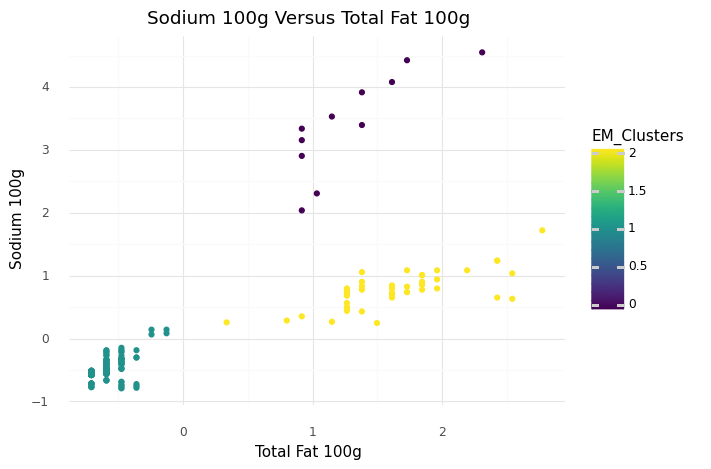

<ggplot: (155844227241)>

In [49]:
(ggplot(Xdf, aes(x = "Total_Fat_100g", y = "Sodium_100g", color = "EM_Clusters")) + 
geom_point() + theme_minimal() + ggtitle('Sodium 100g Versus Total Fat 100g') +
labs(x = 'Total Fat 100g', y = 'Sodium 100g'))


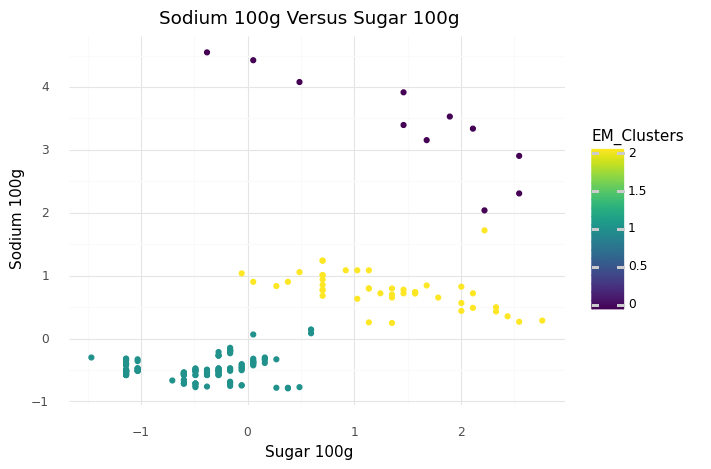

<ggplot: (155843026670)>

In [50]:
(ggplot(Xdf, aes(x = "Sugar_100g", y = "Sodium_100g", color = "EM_Clusters")) + 
geom_point() + theme_minimal() + ggtitle('Sodium 100g Versus Sugar 100g') +
labs(x = 'Sugar 100g', y = 'Sodium 100g'))

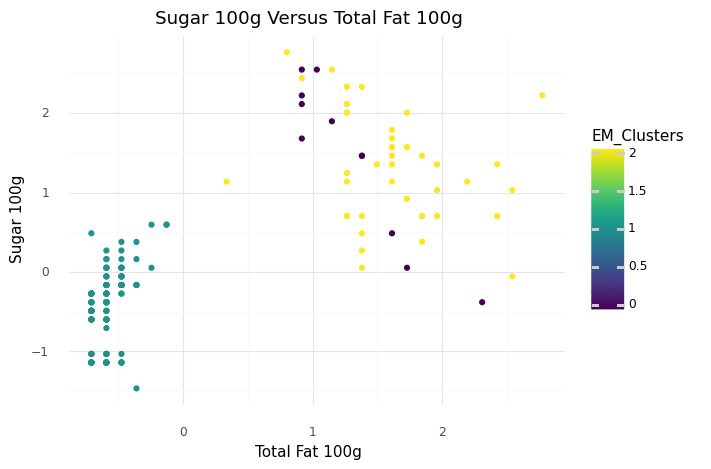

<ggplot: (155846103733)>

In [51]:
(ggplot(Xdf, aes(x = "Total_Fat_100g", y = "Sugar_100g", color = "EM_Clusters")) + 
geom_point() + theme_minimal() + ggtitle('Sugar 100g Versus Total Fat 100g') +
labs(x = 'Total Fat 100g', y = 'Sugar 100g'))

For the Gaussian Mixture Model, the silhouette score was the main factor in determining the 'n_components' value. The chosen n_components value was 3, which resulted in a silhouette score of 0.764. A silhouette score ranges from [-1,1]. A higher score indicates that a data point is compact within a cluster to which it belongs (cohesion) and are far away from other clusters (separation). Our model had a relatively high silhouette score.

When the scatterplots comparing 'Sodium_100g,' 'Total_Fat_100g,' and 'Sugar_100g' were recreated after the model, I saw three relatively distinct clusters except in the Sugar 100g vs the Total Fat 100g model where some of the points seemed to overlap a bit. 

**Scatterplot 1 - Sodium 100g Versus Total Fat 100g**

The cyan cluster at the bottom left included donuts that were low in both sodium and total fat, so I would classify them as 'healthy.' The yellow cluster had donuts that were relatively high in total fat and had higher levels of sodium than the purple clusters, so I would classify them as 'okay.' The purple cluster at the top right included donuts that were high in both sodium and total fat, so I would classify them as 'unhealthy.'

**Scatterplot 2 - Sodium 100g Versus Sugar 100g**

The cyan cluster at the bottom left included donuts that were low in both sodium and sugar, so I would classify them as 'healthy.' The yellow cluster had donuts that were relatively high in sugar and had higher levels of sodium than the cyan clusters, so I would classify them as 'okay.' The purple cluster at the top right included donuts that were high in both sodium and relatively high in sugar, so I would classify them as 'unhealthy.'

**Scatterplot 3 - Sugar 100g Versus Total Fat 100g**

The cyan cluster at the bottom left included donuts that were low in both total fat and sugar, so I would classify them as 'healthy.' The yellow cluster had donuts that were high in both sugar and total fat, so I would classify them as 'unhealthy.' The purple cluster lies within the yellow cluster, and donuts in this cluster have relatively lower amounts of sugar and total fat than the yellow cluster, so I would classify donuts in this cluster as 'okay.'

When evaluating all of the scatter plots, the following trends appeared: donuts in the purple cluster would be classified as 'healthy,' donuts in te cyan cluster would be classified as 'okay,' and donuts in the yelow cluster would be classified as 'unhealthy.'

### K-Means

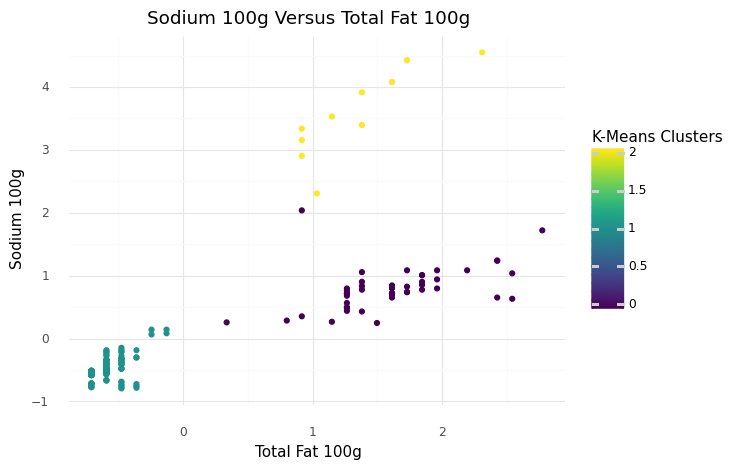

<ggplot: (155843052442)>

In [52]:
(ggplot(X, aes(x = "Total_Fat_100g", y = "Sodium_100g", color = "K-Means Clusters")) + 
geom_point() + theme_minimal() + ggtitle('Sodium 100g Versus Total Fat 100g') + 
labs(x = 'Total Fat 100g',y = 'Sodium 100g'))

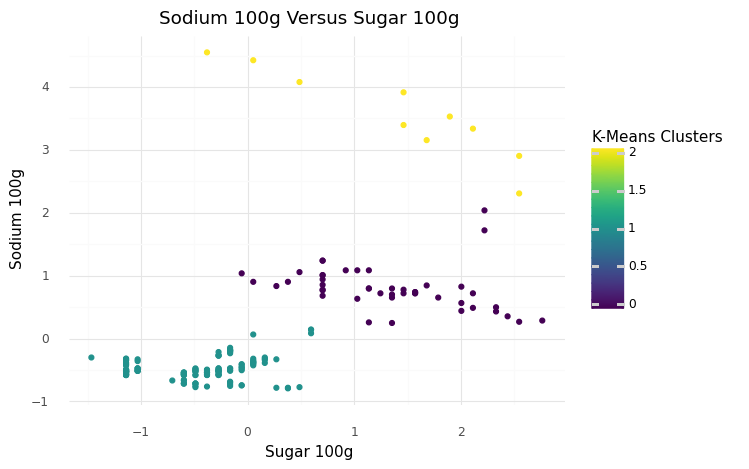

<ggplot: (155838324628)>

In [53]:
(ggplot(X, aes(x = "Sugar_100g", y = "Sodium_100g")) + 
geom_point(aes(color = "K-Means Clusters")) + theme_minimal() + 
ggtitle('Sodium 100g Versus Sugar 100g') + labs(x = 'Sugar 100g',
y = 'Sodium 100g'))

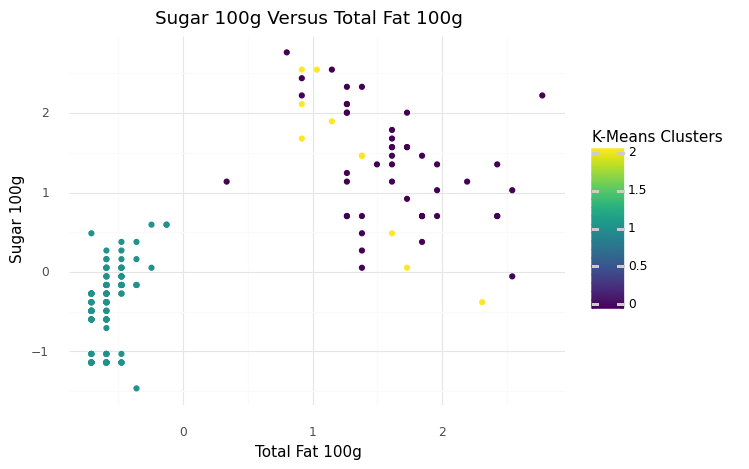

<ggplot: (155843505195)>

In [54]:
(ggplot(X, aes(x = "Total_Fat_100g", y = "Sugar_100g")) + 
geom_point(aes(color = "K-Means Clusters")) + theme_minimal() + 
ggtitle('Sugar 100g Versus Total Fat 100g') + labs(x = 'Total Fat 100g',
y = 'Sugar 100g'))

For the K-Means Model, the silhouette score and sum of squared errors were the main factor in determining the 'k' value. The chosen k value was 3, which resulted in a silhouette score of 0.742. This was marginally higher than the silhouette score of the Gaussian Mixture Model (0.764). This result did not suprise me because I expected the Gaussian Mixture Model to perform better than K-Means. The silhouette score of the model when using the k value of 3 has shown to be worse than that of the Gaussian Mixture Model, but by only a small margin. Both models have relatively high silhouette scores.

When the scatterplots comparing 'Sodium_100g,' 'Total_Fat_100g,' and 'Sugar_100g' were recreated after the model, I saw three relatively distinct clusters that were very similar to the clusters made by the Gaussian Mixture Model. When looking over the scatterplots, I found minor differences within the scatter plots. There were several data points that were included in one cluster of K-Means that was not included in the Gaussian Mixture Model.

**Scatterplot 1 - Sodium 100g Versus Total Fat 100g**

The cyan cluster at the bottom left included donuts that were low in both sodium and total fat, so I would classify them as 'healthy.' The purple cluster had donuts that were relatively high in total fat and had higher levels of sodium than the cyan clusters, so I would classify them as 'okay.' The yellow cluster at the top right included donuts that were high in both sodium and total fat, so I would classify them as 'unhealthy.'

**Scatterplot 2 - Sodium 100g Versus Sugar 100g**

The cyan cluster at the bottom left included donuts that were low in both sodium and sugar, so I would classify them as 'healthy.' The purple cluster had donuts that were relatively high in sugar and had higher levels of sodium than the cyan clusters, so I would classify them as 'okay.' The yellow cluster at the top right included donuts that were high in both sodium and relatively high in sugar, so I would classify them as 'unhealthy.'

**Scatterplot 3 - Sugar 100g Versus Total Fat 100g**

The cyan cluster at the bottom left included donuts that were low in both total fat and sugar, so I would classify them as 'healthy.' The purple cluster had donuts that were high in both sugar and total fat, so I would classify them as 'unhealthy.' The yellow cluster lies in between the purple cluster. Donuts in this cluster have relatively lower amounts of sugar and total fat than the purple cluster, so I would classify donuts in this cluster as 'okay.'

In summary, I saw that patterns that were similar to those in the Gaussian Mixture Model but with minor differences with some data points. Because the scatterplots were nearly the same, there was no change in my interpretation of the clusters. Both the K-Means and Gaussian-Mixture model performed well with this dataset, having high silhouette scores.

## E. Adding Data

I chose to add `Saturated_Fat_100g` variable from the data set to the Gaussian Mixture Model to improve it. I decided on this variable because of my prior knowledge about calroies. During this semester, I decided to take a nutrition course to fulfill my major (Health Science) elective requirements. Calorie intake is important for approrpriate weight management and to prevent the onset of chronic health conditions. 

[0.7674846449297594, 0.7576036467527164, 0.571523862879939, 0.5093465180371494, 0.4841179525405236, 0.5157759216817734, 0.49902304422063015, 0.5020824353975154, 0.4861816029710501]


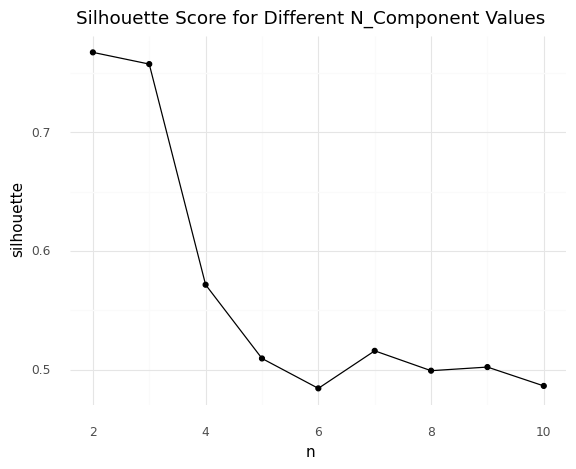

<ggplot: (155843472472)>

In [63]:
# EM Model with Saturated Fat 100g

# selecting features from dataset
features = ['Sodium_100g', 'Total_Fat_100g', 'Sugar_100g', 'Calories_100g']

X = df[features]

# z-scoring features
z = StandardScaler()
X[features] = z.fit_transform(X)
Xdf = X

# running a loop to determine the best n_components value
sils = []
n_components = [2,3,4,5,6,7,8,9,10]

for n in n_components:
    gmm = GaussianMixture(n_components = n)
    gmm.fit(X)
    pred = gmm.predict(X)

    sils.append(silhouette_score(X, pred))

print(sils)

# storing silhouette and n_component values to dataframe
sils_df = pd.DataFrame({"n": n_components,
                      "silhouette": sils})
                      
# plotting dataframe
(ggplot(sils_df, aes(x = "n", y = "silhouette")) + geom_point() + 
geom_line() + 
theme_minimal() + 
labs(title = "Silhouette Score for Different N_Component Values"))


In [66]:
# running Gaussian Mixture Model
EM = GaussianMixture(n_components = 2)
EM.fit(X)
cluster = EM.predict(X)
X["cluster1"] = cluster
# silhouette score
print(silhouette_score(X, cluster))

0.7745842676386906


The addition of `Saturated_Fat_100g` to the model marginally improved the fit of my clustering model. The silhouette score of this new model was 0.775, which was greater than that of the first Gaussian Mixture Model (0.764) by 0.011. This variable did improve the silhouette score, which suggests that it improved the fit of the clustering model.